In [1]:
from complex_landscape_msb import *
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import itertools
from scipy.spatial.distance import hamming
from itertools import product
import time
from collections import Counter
import sys

with open('NK_landscapes_6.txt', 'rb') as f:
    NK_landscapes = pickle.load(f)
with open('NK_paramgrid_msb.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [2]:
with open('NK_landscapes_6.txt', 'rb') as f:
    NK_landscapes = pickle.load(f)
with open('NK_paramgrid_msb.txt', 'rb') as f:
    param_grid = pickle.load(f)
    
def return_all_genotypes(landscape):
    
    landscape_tuple = {}

    for g in landscape:
        landscape_tuple[tuple([str(gi) for gi in g])] = landscape[g]
        
    genotypes = [tuple(x) for x in landscape_tuple.keys()]

    all_genotypes = []
    for i in range(2):
        for g in genotypes:
            all_genotypes.append((i, g))
            
    return(landscape_tuple, all_genotypes)

In [108]:
switching_rates = np.logspace(-6,np.log10(0.5),100)

param, NKind = 5, 5

mu = param_grid[param]['U']
tau = param_grid[param]['tau']
gamma1 = param_grid[param]['gamma1']
init_genotype_index = [11,24,57,5,17,49][NKind]
landscape_tuple_NK, all_genotypes_NK = return_all_genotypes(NK_landscapes[NKind])
all_results = []

NK_pop_sizes = [1000,1000,10000000,10000000,10000000,10000000]
NK_fittest_genotypes = [52,39,6,58,46,14]

In [84]:
mu

4e-05

In [85]:
gamma_pairs = [(0,0),(25,50),(99,99)]

In [86]:
gamma1 = 50
gamma2ind = 50

10000
20000
30000
40000
50000


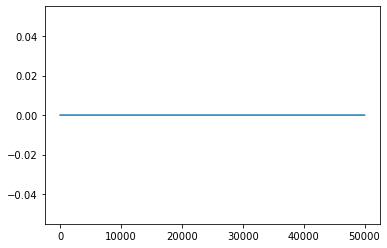

10000
20000
30000
40000
50000


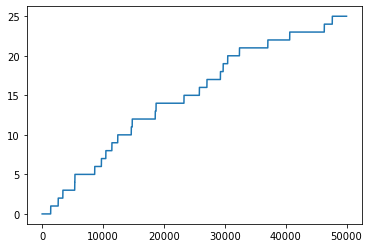

10000
20000
30000
40000
50000


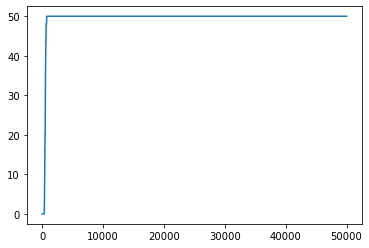

In [89]:
for gamma_pair in gamma_pairs:
    
    gamma1, gamma2ind = gamma_pair
    
    gamma2 = switching_rates[gamma2ind]
    msb_pop = simulation_msb(all_genotypes_NK, landscape_tuple_NK, switching_rates[gamma1], gamma2, mu, tau, all_genotypes_NK[init_genotype_index][1])['pop']
    transition_matrix = construct_transition_matrix(all_genotypes_NK, landscape_tuple_NK,switching_rates[gamma1], gamma2, param_grid[param]['U'], param_grid[param]['tau'])
    fitness_vector = construct_selection_matrix(all_genotypes_NK, landscape_tuple_NK)

    nreps = 50
    pop_size = 10000000
    ncat = len(all_genotypes_NK)
    adaptation_results = np.zeros((nreps, ncat))

    for rep in range(nreps):
        adaptation_results[rep] = np.random.multinomial(pop_size, msb_pop)
    adaptation_results /= np.sum(adaptation_results, axis = 1, keepdims = 1)

    t = 0
    time_start = time.process_time()

    ngen = 50000

    evol_mpf = np.zeros((ngen, nreps))
    evol_argmax = np.zeros((ngen, nreps))
    evol_mrate = np.zeros((ngen, nreps))

    while t < ngen:

        adaptation_results = adaptation_results @ transition_matrix
        adaptation_results *= fitness_vector
        adaptation_results /= np.sum(adaptation_results, axis = 1, keepdims = True)

        for rep in np.arange(nreps):
            adaptation_results[rep] = np.random.multinomial(pop_size, adaptation_results[rep])
            evol_mpf[t, rep] = np.dot(adaptation_results[rep], fitness_vector) / pop_size
            evol_argmax[t, rep] = np.argmax(adaptation_results[rep][:64]+adaptation_results[rep][64:])
            evol_mrate[t, rep] = np.sum(adaptation_results[rep][64:])
        t += 1

        if t % 10000 == 0:
            print(t)

    elapsed_time = time.process_time() - time_start
    evol_fittest = [Counter(evol_argmax[i])[14] for i in range(50000)]
    
    plt.plot(test)
    plt.show()

In [58]:
elapsed_time

814.15625

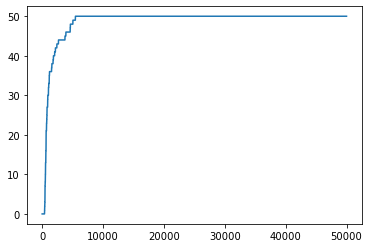

In [59]:
plt.plot(test)

In [91]:
50*20

1000

In [93]:
(elapsed_time*20)/3600

4.660416666666666

In [54]:
evol_argmax

array([[49., 49., 49., ..., 49., 49., 49.],
       [49., 49., 49., ..., 49., 49., 49.],
       [49., 49., 49., ..., 49., 49., 49.],
       ...,
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.],
       [14., 14., 14., ..., 14., 14., 14.]])

In [107]:
all_genotypes_NK.index((0,('1','1','0','1','0','0')))

52

In [11]:
7222/60

120.36666666666666

In [8]:
from sklearn.model_selection import ParameterGrid
import pickle
import numpy as np

In [9]:
mu_values = [4e-5]
tau_values = [100]
#pop_size_values = [10000,1000000]
switching_rate_values = list(np.arange(100))
param_dict = {'U':mu_values, 'tau':tau_values, 'gamma1':switching_rate_values, 'gamma2': switching_rate_values}

In [10]:
len(param_dict)

4

In [11]:
with open('paramgrid_complex_adaptation.txt', 'wb') as f:
    pickle.dump(list(ParameterGrid(param_dict)), f)

In [12]:
len(list(ParameterGrid(param_dict)))

10000